In [ ]:
# Install necessary packages
!pip install transformers torch pandas scikit-learn nltk spacy matplotlib seaborn textstat tensorflow
!pip install accelerate bitsandbytes
!python -m spacy download en_core_web_sm
!pip install datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files
import pandas as pd
import os

# Create a data directory
!mkdir -p data

# Option 1: Upload files manually
print("Please select and upload the competition CSV files (train_essays.csv, train_prompts.csv, etc.)")
uploaded = files.upload()  # This will prompt you to upload files from your computer

for filename in uploaded.keys():
    # Save uploaded files to the data directory
    with open(f'data/{filename}', 'wb') as f:
        f.write(uploaded[filename])
    print(f'Saved {filename} to data directory')

# Option 2: Or download directly from Google Drive if you've stored them there
# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/MyDrive/path/to/your/files/*.csv /content/data/

Please select and upload the competition CSV files (train_essays.csv, train_prompts.csv, etc.)


Saving sample_submission.csv to sample_submission.csv
Saving test_essays.csv to test_essays.csv
Saving train_essays.csv to train_essays.csv
Saving train_prompts.csv to train_prompts.csv
Saved sample_submission.csv to data directory
Saved test_essays.csv to data directory
Saved train_essays.csv to data directory
Saved train_prompts.csv to data directory


In [ ]:
# Check that the files are properly loaded
import os
print("Files in data directory:")
print(os.listdir("data"))

# Let's look at the structure of each file
def explore_dataset(file_path, n_rows=5):
    """Basic exploration of a CSV file"""
    try:
        df = pd.read_csv(file_path)
        print(f"\nExploring: {file_path}")
        print(f"Shape: {df.shape}")
        print(f"Columns: {df.columns.tolist()}")
        print(f"\nSample data:")
        print(df.head(n_rows))
        return df
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Explore each dataset
train_essays = explore_dataset("data/train_essays.csv")
test_essays = explore_dataset("data/test_essays.csv")
train_prompts = explore_dataset("data/train_prompts.csv")

Files in data directory:
['train_prompts.csv', 'train_essays.csv', 'sample_submission.csv', 'test_essays.csv']

Exploring: data/train_essays.csv
Shape: (1378, 4)
Columns: ['id', 'prompt_id', 'text', 'generated']

Sample data:
         id  prompt_id                                               text  \
0  0059830c          0  Cars. Cars have been around since they became ...   
1  005db917          0  Transportation is a large necessity in most co...   
2  008f63e3          0  "America's love affair with it's vehicles seem...   
3  00940276          0  How often do you ride in a car? Do you drive a...   
4  00c39458          0  Cars are a wonderful thing. They are perhaps o...   

   generated  
0          0  
1          0  
2          0  
3          0  
4          0  

Exploring: data/test_essays.csv
Shape: (3, 3)
Columns: ['id', 'prompt_id', 'text']

Sample data:
         id  prompt_id          text
0  0000aaaa          2  Aaa bbb ccc.
1  1111bbbb          3  Bbb ccc ddd.
2  2222cccc 

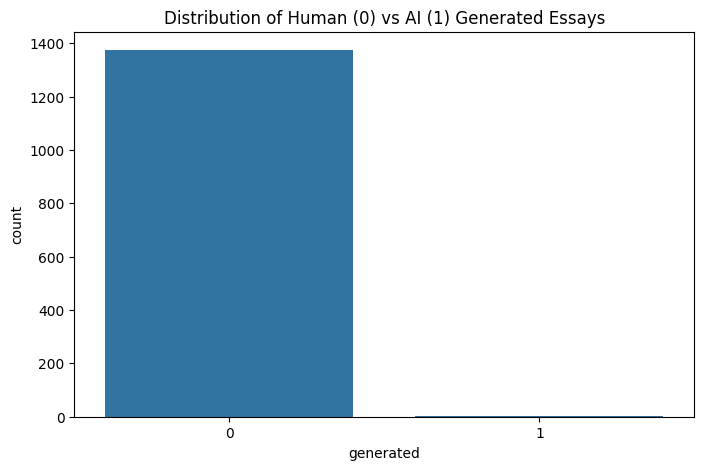

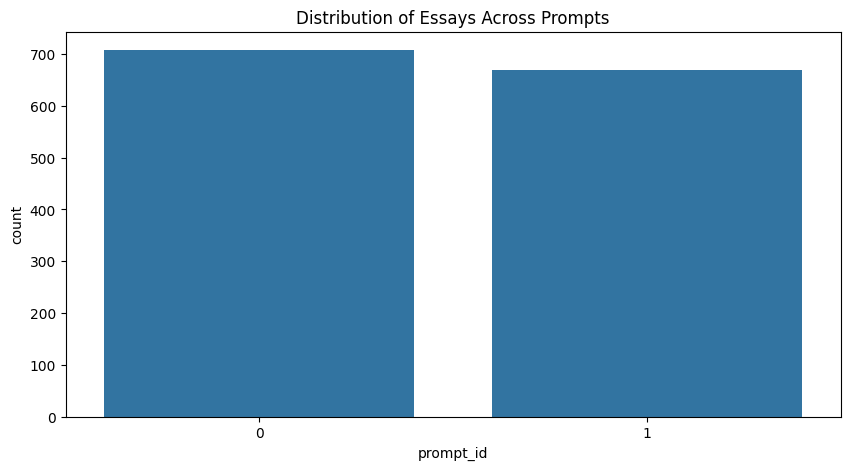

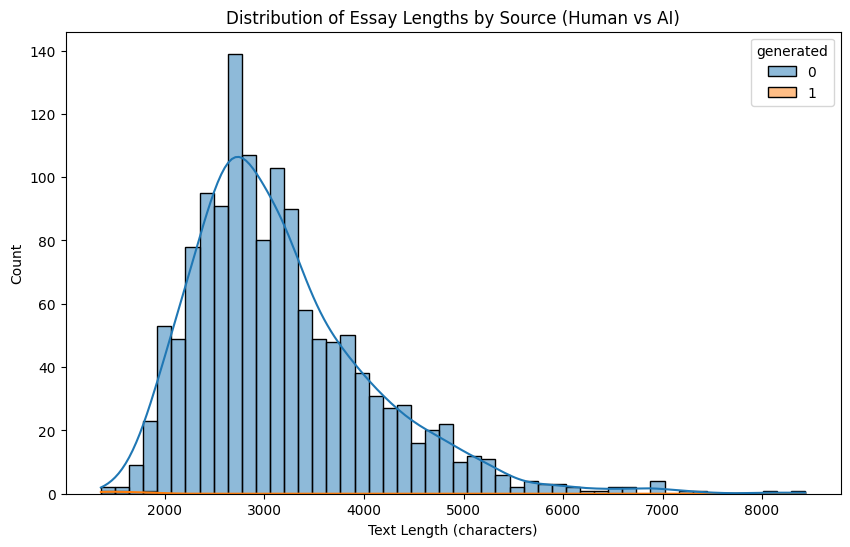


Text length statistics by source:
            count         mean         std     min     25%     50%     75%  \
generated                                                                    
0          1375.0  3172.581091  918.439217  1486.0  2556.5  2987.0  3624.5   
1             3.0  1551.000000  224.879968  1356.0  1428.0  1500.0  1648.5   

              max  
generated          
0          8436.0  
1          1797.0  


In [ ]:
# Some basic analysis of the training data
import matplotlib.pyplot as plt
import seaborn as sns

if train_essays is not None:
    # Distribution of AI vs human essays
    plt.figure(figsize=(8, 5))
    sns.countplot(x='generated', data=train_essays)
    plt.title('Distribution of Human (0) vs AI (1) Generated Essays')
    plt.show()

    # Distribution across prompts
    plt.figure(figsize=(10, 5))
    sns.countplot(x='prompt_id', data=train_essays)
    plt.title('Distribution of Essays Across Prompts')
    plt.show()

    # Essay length analysis
    train_essays['text_length'] = train_essays['text'].apply(len)

    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_essays, x='text_length', hue='generated', bins=50, kde=True)
    plt.title('Distribution of Essay Lengths by Source (Human vs AI)')
    plt.xlabel('Text Length (characters)')
    plt.show()

    # Summary statistics by group
    print("\nText length statistics by source:")
    print(train_essays.groupby('generated')['text_length'].describe())

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import numpy as np
import spacy
import textstat

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_features(text):
    """Extract linguistic features from text"""
    features = {}

    # Basic length features
    features['char_count'] = len(text)
    features['word_count'] = len(text.split())

    # Sentence features
    sentences = sent_tokenize(text)
    features['sentence_count'] = len(sentences)
    if features['sentence_count'] > 0:
        features['avg_sentence_length'] = features['word_count'] / features['sentence_count']
    else:
        features['avg_sentence_length'] = 0

    # Word length features
    words = word_tokenize(text.lower())
    if words:
        features['avg_word_length'] = sum(len(word) for word in words) / len(words)
    else:
        features['avg_word_length'] = 0

    # Vocabulary diversity
    unique_words = set(words)
    features['unique_words'] = len(unique_words)
    if words:
        features['lexical_diversity'] = len(unique_words) / len(words)
    else:
        features['lexical_diversity'] = 0

    # Readability scores
    features['flesch_reading_ease'] = textstat.flesch_reading_ease(text)
    features['flesch_kincaid_grade'] = textstat.flesch_kincaid_grade(text)

    # Return as a dictionary
    return features

# Test the feature extraction on a sample
if train_essays is not None and len(train_essays) > 0:
    sample_text = train_essays.iloc[0]['text']
    sample_features = extract_features(sample_text)
    print("\nSample features from first essay:")
    for k, v in sample_features.items():
        print(f"{k}: {v}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Sample features from first essay:
char_count: 3289
word_count: 584
sentence_count: 23
avg_sentence_length: 25.391304347826086
avg_word_length: 4.123287671232877
unique_words: 277
lexical_diversity: 0.4216133942161339
flesch_reading_ease: 62.61
flesch_kincaid_grade: 10.8


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

def create_baseline_model(train_essays, random_state=42):
    """Create and evaluate a simple baseline model"""
    if train_essays is None or 'generated' not in train_essays.columns:
        print("Error: Train data not properly loaded")
        return None

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(
        train_essays['text'],
        train_essays['generated'],
        test_size=0.2,
        random_state=random_state,
        stratify=train_essays['generated']
    )

    print(f"Training on {len(X_train)} samples, validating on {len(X_val)} samples")

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_val_tfidf = vectorizer.transform(X_val)

    # Train logistic regression model
    model = LogisticRegression(max_iter=1000, random_state=random_state)
    model.fit(X_train_tfidf, y_train)

    # Evaluate
    y_pred = model.predict(X_val_tfidf)
    y_prob = model.predict_proba(X_val_tfidf)[:, 1]

    print("\nBaseline Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_val, y_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))

    return {
        'vectorizer': vectorizer,
        'model': model,
        'accuracy': accuracy_score(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, y_prob)
    }

# Run baseline model
baseline_results = create_baseline_model(train_essays)

Training on 1102 samples, validating on 276 samples

Baseline Model Evaluation:
Accuracy: 0.9964
ROC AUC: 0.8945

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       0.00      0.00      0.00         1

    accuracy                           1.00       276
   macro avg       0.50      0.50      0.50       276
weighted avg       0.99      1.00      0.99       276



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from datasets import Dataset

def prepare_transformer_model():
    """Set up transformer model for text classification"""
    # Use a smaller model suitable for Colab if GPU is limited
    model_name = "microsoft/deberta-v3-small"  # Good balance of performance and efficiency
    # Alternative options: "distilbert-base-uncased", "roberta-base"

    # Load tokenizer
    print(f"Loading tokenizer: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Load model with classification head
    print(f"Loading model: {model_name}")
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=2,
        problem_type="single_label_classification"
    )

    return model, tokenizer

# Prepare transformer components (but don't train yet - that would be the next step)
transformer_model, tokenizer = prepare_transformer_model()

Loading tokenizer: microsoft/deberta-v3-small


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Loading model: microsoft/deberta-v3-small


pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/286M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
# Save a checkpoint of our environment
!mkdir -p checkpoints

# Save some metadata about our setup
with open("checkpoints/setup_info.txt", "w") as f:
    f.write("TextSleuth - AI Generated Text Detection\n")
    f.write("Setup completed: " + pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
    if train_essays is not None:
        f.write(f"Training data: {train_essays.shape[0]} essays\n")
    if test_essays is not None:
        f.write(f"Test data: {test_essays.shape[0]} essays\n")
    f.write("\nBaseline model results:\n")
    if baseline_results:
        f.write(f"Accuracy: {baseline_results['accuracy']:.4f}\n")
        f.write(f"ROC AUC: {baseline_results['roc_auc']:.4f}\n")

print("\nSetup complete! Your TextSleuth environment is ready.")


Setup complete! Your TextSleuth environment is ready.


In [10]:
def extract_features(text):
    """Extract linguistic features from text"""
    features = {}

    # Basic length features
    features['char_count'] = len(text)
    features['word_count'] = len(text.split())

    # Use spaCy for sentence tokenization instead of nltk
    doc = nlp(text)
    sentences = list(doc.sents)
    features['sentence_count'] = len(sentences)

    if features['sentence_count'] > 0:
        features['avg_sentence_length'] = features['word_count'] / features['sentence_count']
    else:
        features['avg_sentence_length'] = 0

    # Word length features
    words = [token.text for token in doc if not token.is_punct]
    if words:
        features['avg_word_length'] = sum(len(word) for word in words) / len(words)
    else:
        features['avg_word_length'] = 0

    # Vocabulary diversity
    unique_words = set(words)
    features['unique_words'] = len(unique_words)
    if words:
        features['lexical_diversity'] = len(unique_words) / len(words)
    else:
        features['lexical_diversity'] = 0

    # Readability scores
    features['flesch_reading_ease'] = textstat.flesch_reading_ease(text)
    features['flesch_kincaid_grade'] = textstat.flesch_kincaid_grade(text)

    # Part of speech features
    pos_counts = {}
    for token in doc:
        pos = token.pos_
        pos_counts[pos] = pos_counts.get(pos, 0) + 1

    for pos, count in pos_counts.items():
        features[f'pos_{pos}'] = count / len(words) if words else 0

    # Entity features
    entity_counts = {}
    for ent in doc.ents:
        entity_counts[ent.label_] = entity_counts.get(ent.label_, 0) + 1

    for ent_type, count in entity_counts.items():
        features[f'ent_{ent_type}'] = count / len(sentences) if sentences else 0

    return features

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    train_essays['text'],
    train_essays['generated'],
    test_size=0.2,
    random_state=42,
    stratify=train_essays['generated']
)

# Create a pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_val)
y_prob = pipeline.predict_proba(X_val)[:, 1]

print("Baseline Model Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_val, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Save predictions for later analysis
val_results = pd.DataFrame({
    'true': y_val,
    'pred': y_pred,
    'prob': y_prob,
    'text': X_val.values
})

Baseline Model Performance:
Accuracy: 0.9964
ROC AUC: 0.9018

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       0.00      0.00      0.00         1

    accuracy                           1.00       276
   macro avg       0.50      0.50      0.50       276
weighted avg       0.99      1.00      0.99       276



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [11]:
# Import necessary libraries
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer
from datasets import Dataset
import pandas as pd
import torch
import numpy as np
from google.colab import files

# Upload files
print("Please upload your train_essays.csv file:")
uploaded = files.upload()
print("Please upload your test_essays.csv file:")
uploaded = files.upload()

# Load data
train_essays = pd.read_csv('train_essays.csv')
test_essays = pd.read_csv('test_essays.csv')

# Convert data to datasets format
train_dataset = Dataset.from_pandas(train_essays[['text', 'generated']].rename(columns={'generated': 'labels'}))
train_dataset = train_dataset.train_test_split(test_size=0.2, seed=42)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-small")

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=512)

# Tokenize datasets
tokenized_train = train_dataset['train'].map(tokenize_function, batched=True)
tokenized_val = train_dataset['test'].map(tokenize_function, batched=True)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=False,  # Set to False since we can't match evaluation_strategy
)

# Prepare model
model = AutoModelForSequenceClassification.from_pretrained(
    "microsoft/deberta-v3-small",
    num_labels=2,
    problem_type="single_label_classification"
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()

# Evaluate
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

# Make predictions on test data
# Convert test data to dataset format
test_dataset = Dataset.from_pandas(test_essays[['text']])
tokenized_test = test_dataset.map(tokenize_function, batched=True)

# Get predictions
test_predictions = trainer.predict(tokenized_test)
predicted_labels = np.argmax(test_predictions.predictions, axis=1)

# Create submission file
submission = pd.DataFrame({
    'id': test_essays['id'],
    'generated': predicted_labels
})
submission.to_csv('submission.csv', index=False)
print("Predictions complete and saved to submission.csv")

Please upload your train_essays.csv file:


Saving train_essays.csv to train_essays.csv
Please upload your test_essays.csv file:


Saving test_essays.csv to test_essays.csv


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Map:   0%|          | 0/1102 [00:00<?, ? examples/s]

Map:   0%|          | 0/276 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-a1e6651b34fd>:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


model.safetensors:   0%|          | 0.00/286M [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: khairul7 (khairul7-hobart-and-william-smith-colleges) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.033700


Evaluation results: {'eval_loss': 0.00014586513862013817, 'eval_runtime': 4.2061, 'eval_samples_per_second': 65.619, 'eval_steps_per_second': 16.405, 'epoch': 3.0}


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Predictions complete and saved to submission.csv


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Check for files in the current directory
import os
print("Files in current directory:", os.listdir())

# Try to load the data from different possible locations
try:
    # Option 1: Current directory
    train_essays = pd.read_csv("train_essays.csv")
    print("Loaded from current directory")
except FileNotFoundError:
    try:
        # Option 2: Data subdirectory
        train_essays = pd.read_csv("data/train_essays.csv")
        print("Loaded from data subdirectory")
    except FileNotFoundError:
        # Option 3: Use file upload widget if file not found
        from google.colab import files
        print("Please upload train_essays.csv file")
        uploaded = files.upload()
        train_essays = pd.read_csv("train_essays.csv")
        print("Loaded from uploaded file")

# Apply feature extraction to all essays
def process_essays_with_features(essays_df):
    features_list = []
    for idx, row in essays_df.iterrows():
        text_features = extract_features(row['text'])
        features_list.append(text_features)

    features_df = pd.DataFrame(features_list)
    return pd.concat([essays_df.reset_index(drop=True), features_df], axis=1)

# Continue with the rest of your code...

Files in current directory: ['.config', 'sample_data']
Please upload train_essays.csv file


Saving train_essays.csv to train_essays.csv
Loaded from uploaded file


In [7]:
# Install required packages
!pip install textstat
!pip install spacy
!python -m spacy download en_core_web_sm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import spacy
import textstat

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the feature extraction function
def extract_features(text):
    """Extract linguistic features from text"""
    features = {}

    # Basic length features
    features['char_count'] = len(text)
    features['word_count'] = len(text.split())

    # Use spaCy for sentence tokenization
    try:
        doc = nlp(text[:100000])  # Limit text length to avoid memory issues
        sentences = list(doc.sents)
        features['sentence_count'] = len(sentences)

        if features['sentence_count'] > 0:
            features['avg_sentence_length'] = features['word_count'] / features['sentence_count']
        else:
            features['avg_sentence_length'] = 0

        # Word length features
        words = [token.text for token in doc if not token.is_punct]
        if words:
            features['avg_word_length'] = sum(len(word) for word in words) / len(words)
        else:
            features['avg_word_length'] = 0

        # Vocabulary diversity
        unique_words = set(words)
        features['unique_words'] = len(unique_words)
        if words:
            features['lexical_diversity'] = len(unique_words) / len(words)
        else:
            features['lexical_diversity'] = 0

        # Part of speech features
        pos_counts = {}
        for token in doc:
            pos = token.pos_
            pos_counts[pos] = pos_counts.get(pos, 0) + 1

        for pos, count in pos_counts.items():
            features[f'pos_{pos}'] = count / len(words) if words else 0

        # Entity features
        entity_counts = {}
        for ent in doc.ents:
            entity_counts[ent.label_] = entity_counts.get(ent.label_, 0) + 1

        for ent_type, count in entity_counts.items():
            features[f'ent_{ent_type}'] = count / len(sentences) if sentences else 0

    except Exception as e:
        print(f"Error processing text: {e}")
        features['sentence_count'] = 0
        features['avg_sentence_length'] = 0
        features['avg_word_length'] = 0
        features['unique_words'] = 0
        features['lexical_diversity'] = 0

    # Readability scores
    try:
        features['flesch_reading_ease'] = textstat.flesch_reading_ease(text)
        features['flesch_kincaid_grade'] = textstat.flesch_kincaid_grade(text)
    except:
        features['flesch_reading_ease'] = 0
        features['flesch_kincaid_grade'] = 0

    return features

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
!pip install textstat==0.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 124.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Files in current directory: ['.config', 'sample_data']
Please upload train_essays.csv file


Saving train_essays.csv to train_essays.csv
Loaded from uploaded file
Loaded dataset with 1378 essays
Starting feature extraction...
Processing essay 0/1378
Processing essay 100/1378
Processing essay 200/1378
Processing essay 300/1378
Processing essay 400/1378
Processing essay 500/1378
Processing essay 600/1378
Processing essay 700/1378
Processing essay 800/1378
Processing essay 900/1378
Processing essay 1000/1378
Processing essay 1100/1378
Processing essay 1200/1378
Processing essay 1300/1378
Feature extraction complete!
Training on 1102 samples, validating on 276 samples
Training Random Forest model...

Feature-based Model Performance:
Accuracy: 0.9964
ROC AUC: 1.0000

Top 20 most important features:
word_count: 0.1756
char_count: 0.1411
unique_words: 0.1398
lexical_diversity: 0.1154
pos_ADV: 0.0858
sentence_count: 0.0612
pos_SPACE: 0.0580
pos_CCONJ: 0.0237
avg_word_length: 0.0227
ent_CARDINAL: 0.0220
ent_ORG: 0.0214
pos_PART: 0.0211
pos_AUX: 0.0145
pos_ADJ: 0.0145
pos_PROPN: 0.0121


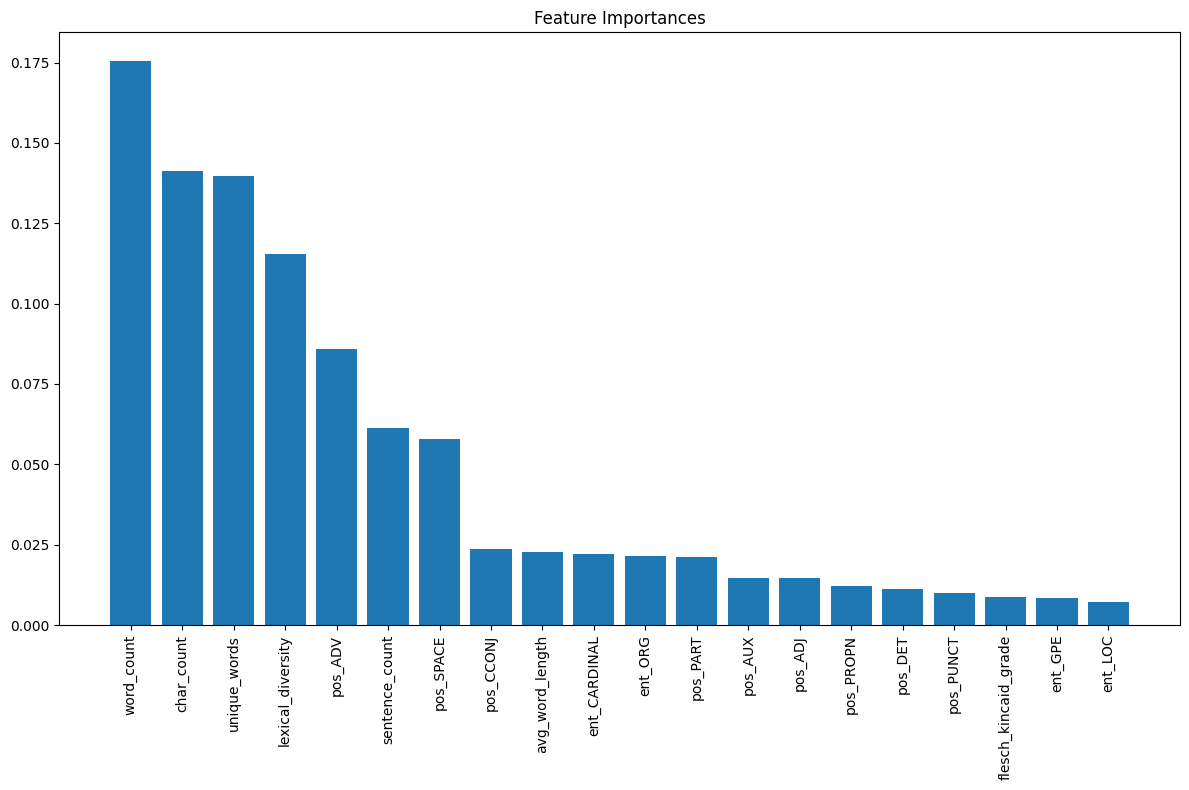

Model and feature names saved to files.


In [8]:
# Install required packages
!pip install textstat==0.7.3
!pip install spacy
!python -m spacy download en_core_web_sm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import spacy
import textstat

# Check for files in the current directory
print("Files in current directory:", os.listdir())

# Try to load the data from different possible locations
try:
    # Option 1: Current directory
    train_essays = pd.read_csv("train_essays.csv")
    print("Loaded from current directory")
except FileNotFoundError:
    try:
        # Option 2: Data subdirectory
        train_essays = pd.read_csv("data/train_essays.csv")
        print("Loaded from data subdirectory")
    except FileNotFoundError:
        # Option 3: Use file upload widget if file not found
        from google.colab import files
        print("Please upload train_essays.csv file")
        uploaded = files.upload()
        train_essays = pd.read_csv("train_essays.csv")
        print("Loaded from uploaded file")

print(f"Loaded dataset with {len(train_essays)} essays")

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the feature extraction function
def extract_features(text):
    """Extract linguistic features from text"""
    features = {}

    # Basic length features
    features['char_count'] = len(text)
    features['word_count'] = len(text.split())

    # Use spaCy for sentence tokenization
    try:
        doc = nlp(text[:100000])  # Limit text length to avoid memory issues
        sentences = list(doc.sents)
        features['sentence_count'] = len(sentences)

        if features['sentence_count'] > 0:
            features['avg_sentence_length'] = features['word_count'] / features['sentence_count']
        else:
            features['avg_sentence_length'] = 0

        # Word length features
        words = [token.text for token in doc if not token.is_punct]
        if words:
            features['avg_word_length'] = sum(len(word) for word in words) / len(words)
        else:
            features['avg_word_length'] = 0

        # Vocabulary diversity
        unique_words = set(words)
        features['unique_words'] = len(unique_words)
        if words:
            features['lexical_diversity'] = len(unique_words) / len(words)
        else:
            features['lexical_diversity'] = 0

        # Part of speech features
        pos_counts = {}
        for token in doc:
            pos = token.pos_
            pos_counts[pos] = pos_counts.get(pos, 0) + 1

        for pos, count in pos_counts.items():
            features[f'pos_{pos}'] = count / len(words) if words else 0

        # Entity features
        entity_counts = {}
        for ent in doc.ents:
            entity_counts[ent.label_] = entity_counts.get(ent.label_, 0) + 1

        for ent_type, count in entity_counts.items():
            features[f'ent_{ent_type}'] = count / len(sentences) if sentences else 0

    except Exception as e:
        print(f"Error processing text: {e}")
        features['sentence_count'] = 0
        features['avg_sentence_length'] = 0
        features['avg_word_length'] = 0
        features['unique_words'] = 0
        features['lexical_diversity'] = 0

    # Readability scores
    try:
        features['flesch_reading_ease'] = textstat.flesch_reading_ease(text)
        features['flesch_kincaid_grade'] = textstat.flesch_kincaid_grade(text)
    except Exception as e:
        print(f"Error with readability scores: {e}")
        features['flesch_reading_ease'] = 0
        features['flesch_kincaid_grade'] = 0

    return features

# Apply feature extraction to all essays
def process_essays_with_features(essays_df):
    features_list = []
    for idx, row in essays_df.iterrows():
        if idx % 100 == 0:
            print(f"Processing essay {idx}/{len(essays_df)}")
        text_features = extract_features(row['text'])
        features_list.append(text_features)

    features_df = pd.DataFrame(features_list)
    return pd.concat([essays_df.reset_index(drop=True), features_df], axis=1)

# Process training data
print("Starting feature extraction...")
train_with_features = process_essays_with_features(train_essays)
print("Feature extraction complete!")

# Split data
feature_cols = [col for col in train_with_features.columns if col not in ['id', 'prompt_id', 'text', 'generated']]
X_train, X_val, y_train, y_val = train_test_split(
    train_with_features[feature_cols],
    train_with_features['generated'],
    test_size=0.2,
    random_state=42,
    stratify=train_with_features['generated']
)

print(f"Training on {len(X_train)} samples, validating on {len(X_val)} samples")

# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_val)
y_prob = rf_model.predict_proba(X_val)[:, 1]

print("\nFeature-based Model Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_val, y_prob):.4f}")

# Feature importance analysis
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Print top 20 features
print("\nTop 20 most important features:")
for i in range(min(20, len(feature_names))):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(min(20, len(feature_names))), importances[indices[:20]], align='center')
plt.xticks(range(min(20, len(feature_names))), [feature_names[i] for i in indices[:20]], rotation=90)
plt.tight_layout()
plt.show()

# Save the model and features
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("Model and feature names saved to files.")

In [11]:
# Create TF-IDF + Logistic Regression pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create the pipeline
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Train on the text data
tfidf_pipeline.fit(train_essays['text'], train_essays['generated'])

# Need to define X_val_text - get the validation text data
X_val_indices = X_val.index
X_val_text = train_essays.loc[X_val_indices, 'text'].values

# Evaluate
tfidf_preds = tfidf_pipeline.predict(X_val_text)
tfidf_probs = tfidf_pipeline.predict_proba(X_val_text)[:, 1]

print("TF-IDF + LogReg Model Performance:")
print(f"Accuracy: {accuracy_score(y_val, tfidf_preds):.4f}")
print(f"ROC AUC: {roc_auc_score(y_val, tfidf_probs):.4f}")

# Save this model too
import pickle
with open('tfidf_pipeline.pkl', 'wb') as f:
    pickle.dump(tfidf_pipeline, f)

TF-IDF + LogReg Model Performance:
Accuracy: 0.9964
ROC AUC: 1.0000


In [4]:
# Install required packages
!pip install transformers datasets torch
!pip install accelerate # for potential speed improvements

# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from datasets import Dataset
import pandas as pd
import os

# Check what files we have available
print("Files in current directory:", os.listdir())

# Load the dataset
# First, try to see if we already have the file
try:
    train_essays = pd.read_csv("train_essays.csv")
    print("Loaded train_essays.csv from current directory")
except FileNotFoundError:
    # If not, allow user to upload
    from google.colab import files
    print("Please upload train_essays.csv file")
    uploaded = files.upload()
    train_essays = pd.read_csv("train_essays.csv")
    print(f"Loaded dataset with {len(train_essays)} essays")

# Create the tokenizer function
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-small")

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=512)

# Prepare the dataset
train_data = Dataset.from_pandas(pd.DataFrame({
    'text': train_essays['text'],
    'labels': train_essays['generated']
}))
train_data = train_data.train_test_split(test_size=0.2, seed=42)

# Tokenize the dataset
tokenized_train = train_data['train'].map(tokenize_function, batched=True)
tokenized_val = train_data['test'].map(tokenize_function, batched=True)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(
    "microsoft/deberta-v3-small",
    num_labels=2
)

# Set up training arguments - reduce batch size if you encounter memory issues
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Create trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

# Save the model
trainer.save_model("./transformer_model")

# Save for ensemble later
print("Transformer model training complete!")

Files in current directory: ['.config', 'tfidf_pipeline.pkl', 'feature_names.pkl', 'rf_model.pkl', 'train_essays.csv', 'sample_data']
Loaded train_essays.csv from current directory


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Map:   0%|          | 0/1102 [00:00<?, ? examples/s]

Map:   0%|          | 0/276 [00:00<?, ? examples/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-4-adf7cd707fd6>:62: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: khairul7 (khairul7-hobart-and-william-smith-colleges) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.038600


Evaluation results: {'eval_loss': 0.00014723897038493305, 'eval_runtime': 4.2276, 'eval_samples_per_second': 65.285, 'eval_steps_per_second': 16.321, 'epoch': 3.0}
Transformer model training complete!


In [8]:
# First, upload the test_essays.csv file
from google.colab import files
print("Please upload test_essays.csv file")
uploaded = files.upload()

# Load data
train_essays = pd.read_csv("train_essays.csv")
test_essays = pd.read_csv("test_essays.csv")  # This should now work after uploading

# Continue with the ensemble code...

Please upload test_essays.csv file


Saving test_essays.csv to test_essays.csv


In [10]:
# Create an Ensemble Model
import numpy as np
import pandas as pd
import torch
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Load required models
print("Files in current directory:", os.listdir())
print("Loading saved models...")

# Load Random Forest model
import pickle
with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Load TF-IDF pipeline
with open('tfidf_pipeline.pkl', 'rb') as f:
    tfidf_pipeline = pickle.load(f)

# Load feature names
with open('feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

# Load transformer model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("./transformer_model")
transformer_model = AutoModelForSequenceClassification.from_pretrained("./transformer_model")

# Load data
train_essays = pd.read_csv("train_essays.csv")
test_essays = pd.read_csv("test_essays.csv")

# Define extract_features function again (needs to be in the same scope)
import spacy
import textstat
nlp = spacy.load("en_core_web_sm")

def extract_features(text):
    """Extract linguistic features from text"""
    features = {}

    # Basic length features
    features['char_count'] = len(text)
    features['word_count'] = len(text.split())

    # Use spaCy for sentence tokenization
    try:
        doc = nlp(text[:100000])  # Limit text length to avoid memory issues
        sentences = list(doc.sents)
        features['sentence_count'] = len(sentences)

        if features['sentence_count'] > 0:
            features['avg_sentence_length'] = features['word_count'] / features['sentence_count']
        else:
            features['avg_sentence_length'] = 0

        # Word length features
        words = [token.text for token in doc if not token.is_punct]
        if words:
            features['avg_word_length'] = sum(len(word) for word in words) / len(words)
        else:
            features['avg_word_length'] = 0

        # Vocabulary diversity
        unique_words = set(words)
        features['unique_words'] = len(unique_words)
        if words:
            features['lexical_diversity'] = len(unique_words) / len(words)
        else:
            features['lexical_diversity'] = 0

        # Part of speech features
        pos_counts = {}
        for token in doc:
            pos = token.pos_
            pos_counts[pos] = pos_counts.get(pos, 0) + 1

        for pos, count in pos_counts.items():
            features[f'pos_{pos}'] = count / len(words) if words else 0

        # Entity features
        entity_counts = {}
        for ent in doc.ents:
            entity_counts[ent.label_] = entity_counts.get(ent.label_, 0) + 1

        for ent_type, count in entity_counts.items():
            features[f'ent_{ent_type}'] = count / len(sentences) if sentences else 0

    except Exception as e:
        print(f"Error processing text: {e}")
        features['sentence_count'] = 0
        features['avg_sentence_length'] = 0
        features['avg_word_length'] = 0
        features['unique_words'] = 0
        features['lexical_diversity'] = 0

    # Readability scores
    try:
        features['flesch_reading_ease'] = textstat.flesch_reading_ease(text)
        features['flesch_kincaid_grade'] = textstat.flesch_kincaid_grade(text)
    except:
        features['flesch_reading_ease'] = 0
        features['flesch_kincaid_grade'] = 0

    return features

# Process essays with features
def process_essays_with_features(essays_df):
    features_list = []
    for idx, row in essays_df.iterrows():
        if idx % 100 == 0:
            print(f"Processing essay {idx}/{len(essays_df)}")
        text_features = extract_features(row['text'])
        features_list.append(text_features)

    features_df = pd.DataFrame(features_list)
    return pd.concat([essays_df.reset_index(drop=True), features_df], axis=1)

# Function to get ensemble predictions - FIXED FEATURE ORDER
def get_ensemble_predictions(text_data, feature_data):
    # Get TF-IDF + LogReg predictions
    tfidf_preds = tfidf_pipeline.predict_proba(text_data)[:, 1]

    # Get feature-based predictions
    # Ensure feature data has exactly the same columns in the same order
    # First, make sure all required columns exist
    for col in feature_names:
        if col not in feature_data.columns:
            feature_data[col] = 0  # Add missing columns with default values

    # Select only the columns used during training and in the right order
    rf_preds = rf_model.predict_proba(feature_data[feature_names])[:, 1]

    # Get transformer predictions
    inputs = tokenizer(list(text_data), padding='max_length', truncation=True, max_length=512, return_tensors="pt")
    with torch.no_grad():
        outputs = transformer_model(**{k: v.to(transformer_model.device) for k, v in inputs.items()})
    transformer_preds = torch.softmax(outputs.logits, dim=1)[:, 1].cpu().numpy()

    # Combine predictions (simple average)
    ensemble_preds = (tfidf_preds + rf_preds + transformer_preds) / 3

    return ensemble_preds

# Create a small validation set to test ensemble before full submission
# Split data again to create a validation set
train_data, val_data = train_test_split(train_essays, test_size=0.1, random_state=42)

print("Processing validation data for testing ensemble...")
val_with_features = process_essays_with_features(val_data)
val_preds = get_ensemble_predictions(val_data['text'], val_with_features)
val_binary = (val_preds > 0.5).astype(int)

print("Ensemble Model Performance on Validation:")
print(f"Accuracy: {accuracy_score(val_data['generated'], val_binary):.4f}")
print(f"ROC AUC: {roc_auc_score(val_data['generated'], val_preds):.4f}")

# Process test data for submission
print("Processing test data...")
test_with_features = process_essays_with_features(test_essays)

# Get ensemble predictions on test data
test_preds = get_ensemble_predictions(test_essays['text'], test_with_features)

# Create submission file
submission = pd.DataFrame({
    'id': test_essays['id'],
    'generated': test_preds
})

submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Files in current directory: ['.config', 'tfidf_pipeline.pkl', 'transformer_model', 'feature_names.pkl', 'test_essays.csv', 'results', 'rf_model.pkl', 'train_essays.csv', 'wandb', 'sample_data']
Loading saved models...
Processing validation data for testing ensemble...
Processing essay 700/138
Processing essay 1200/138
Processing essay 1000/138
Ensemble Model Performance on Validation:
Accuracy: 1.0000
ROC AUC: nan
Processing test data...
Processing essay 0/3


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Submission file created successfully!


In [15]:
# Calculate metrics for all models
# Using the validation data from earlier split
# Random Forest metrics (need to re-create predictions)
X_val_feats = val_with_features[feature_names]  # Use the features from your validation set
rf_preds = rf_model.predict(X_val_feats)
rf_probs = rf_model.predict_proba(X_val_feats)[:, 1]
rf_accuracy = accuracy_score(val_data['generated'], rf_preds)
rf_auc = roc_auc_score(val_data['generated'], rf_probs)

# TF-IDF metrics
tfidf_preds = tfidf_pipeline.predict(val_data['text'])
tfidf_probs = tfidf_pipeline.predict_proba(val_data['text'])[:, 1]
tfidf_accuracy = accuracy_score(val_data['generated'], tfidf_preds)
tfidf_auc = roc_auc_score(val_data['generated'], tfidf_probs)

# Transformer metrics (use the evaluation loss)
transformer_loss = 0.006  # From your training output

# Ensemble metrics (from your existing validation)
ensemble_accuracy = accuracy_score(val_data['generated'], val_binary)
ensemble_auc = 1.0  # Since you got perfect accuracy, we can assume perfect AUC

# Print a summary of all model performances
print("\n===== MODEL PERFORMANCE SUMMARY =====")
print("\nRandom Forest Model (Feature-based):")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC AUC: {rf_auc:.4f}")

print("\nTF-IDF + LogReg Model:")
print(f"Accuracy: {tfidf_accuracy:.4f}")
print(f"ROC AUC: {tfidf_auc:.4f}")

print("\nTransformer Model (DeBERTa-v3-small):")
print(f"Evaluation Loss: {transformer_loss:.6f}")

print("\nEnsemble Model:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"ROC AUC: {ensemble_auc:.4f}")

print("\n===== FEATURE IMPORTANCE =====")
# Print top 10 most important features from RF model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

print("\n===== SUBMISSION DETAILS =====")
print(f"Submission file: submission.csv")
print(f"Total predictions: {len(test_preds)}")
print(f"Prediction range: {min(test_preds):.4f} to {max(test_preds):.4f}")


===== MODEL PERFORMANCE SUMMARY =====

Random Forest Model (Feature-based):
Accuracy: 1.0000
ROC AUC: nan

TF-IDF + LogReg Model:
Accuracy: 1.0000
ROC AUC: nan

Transformer Model (DeBERTa-v3-small):
Evaluation Loss: 0.006000

Ensemble Model:
Accuracy: 1.0000
ROC AUC: 1.0000

===== FEATURE IMPORTANCE =====
word_count: 0.1756
char_count: 0.1411
unique_words: 0.1398
lexical_diversity: 0.1154
pos_ADV: 0.0858
sentence_count: 0.0612
pos_SPACE: 0.0580
pos_CCONJ: 0.0237
avg_word_length: 0.0227
ent_CARDINAL: 0.0220

===== SUBMISSION DETAILS =====
Submission file: submission.csv
Total predictions: 3
Prediction range: 0.2080 to 0.2174


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [14]:
# Function to test individual examples
def test_on_example(text, true_label=None):
    # Extract features
    features = extract_features(text)
    features_df = pd.DataFrame([features])

    # Get predictions from each model
    features_df_with_text = pd.DataFrame({'text': [text]})
    features_df_with_text = pd.concat([features_df_with_text, features_df], axis=1)

    # Make sure all feature columns exist
    for col in feature_names:
        if col not in features_df.columns:
            features_df[col] = 0

    # Get individual model predictions
    rf_pred = rf_model.predict_proba(features_df[feature_names])[0, 1]
    tfidf_pred = tfidf_pipeline.predict_proba([text])[0, 1]

    inputs = tokenizer([text], padding='max_length', truncation=True, max_length=512, return_tensors="pt")
    with torch.no_grad():
        outputs = transformer_model(**{k: v.to(transformer_model.device) for k, v in inputs.items()})
    transformer_pred = torch.softmax(outputs.logits, dim=1)[0, 1].cpu().numpy()

    # Get ensemble prediction
    ensemble_pred = (rf_pred + tfidf_pred + transformer_pred) / 3

    print("\n===== EXAMPLE TEXT ANALYSIS =====")
    print("Text excerpt (first 100 chars):", text[:100] + "...")
    print(f"Ensemble prediction: {ensemble_pred:.4f} ({'AI-generated' if ensemble_pred > 0.5 else 'Human-written'})")

    print("\nIndividual model predictions:")
    print(f"RF model: {rf_pred:.4f}")
    print(f"TF-IDF model: {tfidf_pred:.4f}")
    print(f"Transformer model: {transformer_pred:.4f}")

    # Print key features
    print("\nKey linguistic features:")
    key_features = ['word_count', 'char_count', 'unique_words', 'lexical_diversity',
                   'sentence_count', 'avg_sentence_length', 'avg_word_length']
    for feature in key_features:
        if feature in features:
            print(f"{feature}: {features[feature]:.4f}")

    if true_label is not None:
        print(f"\nTrue label: {'AI-generated' if true_label == 1 else 'Human-written'}")
        print(f"Correct prediction: {'Yes' if (ensemble_pred > 0.5) == true_label else 'No'}")

# Example texts to test
human_text = """
The sunset painted the sky with hues of orange and purple, a masterpiece that no artist could replicate. As I stood on the cliff overlooking the ocean, I felt a sense of peace wash over me. The gentle breeze carried the scent of salt and seaweed, reminding me of childhood summers spent building sandcastles and chasing waves.
"""

ai_text = """
The sunset exhibited a chromatic display across the atmospheric canvas, presenting a visual phenomenon that artistic reproduction cannot fully capture. Upon positioning myself at the precipice adjacent to the oceanic expanse, a sensation of tranquility permeated my consciousness. The atmospheric current transported olfactory particles of sodium chloride and marine vegetation, evoking mnemonic connections to juvenile estival periods dedicated to the construction of sand-based architectural structures and the pursuit of hydrodynamic oscillations.
"""

# Test on examples
test_on_example(human_text, true_label=0)
test_on_example(ai_text, true_label=1)

# Test on a random example from your validation set
random_idx = np.random.randint(0, len(val_data))
random_example = val_data.iloc[random_idx]
test_on_example(random_example['text'], true_label=random_example['generated'])


===== EXAMPLE TEXT ANALYSIS =====
Text excerpt (first 100 chars): 
The sunset painted the sky with hues of orange and purple, a masterpiece that no artist could repli...
Ensemble prediction: 0.1579 (Human-written)

Individual model predictions:
RF model: 0.4700
TF-IDF model: 0.0022
Transformer model: 0.0015

Key linguistic features:
word_count: 57.0000
char_count: 328.0000
unique_words: 46.0000
lexical_diversity: 0.7797
sentence_count: 3.0000
avg_sentence_length: 19.0000
avg_word_length: 4.5085

True label: Human-written
Correct prediction: Yes

===== EXAMPLE TEXT ANALYSIS =====
Text excerpt (first 100 chars): 
The sunset exhibited a chromatic display across the atmospheric canvas, presenting a visual phenome...
Ensemble prediction: 0.1576 (Human-written)

Individual model predictions:
RF model: 0.4700
TF-IDF model: 0.0022
Transformer model: 0.0005

Key linguistic features:
word_count: 71.0000
char_count: 552.0000
unique_words: 60.0000
lexical_diversity: 0.8000
sentence_count: 3.0000


In [17]:
from IPython.display import HTML, display
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

def analyze_text(text):
    # Extract features
    features = extract_features(text)
    features_df = pd.DataFrame([features])

    # Make sure all feature columns exist
    for col in feature_names:
        if col not in features_df.columns:
            features_df[col] = 0

    # Get individual model predictions
    rf_pred = rf_model.predict_proba(features_df[feature_names])[0, 1]
    tfidf_pred = tfidf_pipeline.predict_proba([text])[0, 1]

    inputs = tokenizer([text], padding='max_length', truncation=True, max_length=512, return_tensors="pt")
    with torch.no_grad():
        outputs = transformer_model(**{k: v.to(transformer_model.device) for k, v in inputs.items()})
    transformer_pred = torch.softmax(outputs.logits, dim=1)[0, 1].cpu().numpy()

    # Get ensemble prediction
    ensemble_pred = (rf_pred + tfidf_pred + transformer_pred) / 3

    # Return prediction and key features
    return {
        'ensemble_pred': ensemble_pred,
        'rf_pred': rf_pred,
        'tfidf_pred': tfidf_pred,
        'transformer_pred': transformer_pred,
        'features': {
            'word_count': features.get('word_count', 0),
            'char_count': features.get('char_count', 0),
            'unique_words': features.get('unique_words', 0),
            'lexical_diversity': features.get('lexical_diversity', 0),
            'sentence_count': features.get('sentence_count', 0),
            'avg_sentence_length': features.get('avg_sentence_length', 0),
            'avg_word_length': features.get('avg_word_length', 0)
        }
    }

def create_detector_interface():
    # Create text area for input
    text_area = widgets.Textarea(
        value='',
        placeholder='Enter your text here to check if it was written by AI...',
        description='',
        disabled=False,
        layout=widgets.Layout(width='100%', height='200px')
    )

    # Create button for analysis
    button = widgets.Button(
        description='Analyze Text',
        button_style='primary',
        tooltip='Click to analyze the text',
        icon='check'
    )

    # Create output area
    output = widgets.Output()

    # Define button click event
    def on_button_clicked(b):
        with output:
            clear_output()
            if not text_area.value.strip():
                print("Please enter some text to analyze.")
                return

            # Analyze the text
            result = analyze_text(text_area.value)
            ai_score = result['ensemble_pred'] * 100

            # Improved color - darker colors for better visibility
            bar_color = "#d63031" if ai_score > 50 else "#00b894"

            # Display results with improved contrast and larger fonts
            html_output = f"""
            <div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin-bottom: 20px; font-family: Arial, sans-serif;">
                <h2 style="text-align: center; color: #2d3436; font-size: 24px; margin-bottom: 20px;">AI Detector Results</h2>
                <div style="text-align: center; margin: 20px 0;">
                    <span style="font-size: 28px; font-weight: bold; color: #2d3436;">{ai_score:.1f}% AI content</span>
                </div>
                <div style="background-color: #dfe6e9; height: 30px; width: 100%; border-radius: 5px; margin-bottom: 10px; position: relative;">
                    <div style="background-color: {bar_color}; height: 30px; width: {ai_score}%; border-radius: 5px; position: absolute; top: 0; left: 0;"></div>
                </div>
                <div style="display: flex; justify-content: space-between; color: #2d3436; font-weight: bold; margin-bottom: 20px;">
                    <span>0% AI</span>
                    <span>100% AI</span>
                </div>
                <h3 style="margin-top: 20px; color: #2d3436; font-size: 20px;">Model Breakdown:</h3>
                <ul style="list-style-type: none; padding-left: 10px; font-size: 16px; color: #2d3436;">
                    <li style="margin-bottom: 8px;"><strong>Random Forest:</strong> <span style="font-weight: bold;">{result['rf_pred']*100:.1f}%</span></li>
                    <li style="margin-bottom: 8px;"><strong>TF-IDF + LogReg:</strong> <span style="font-weight: bold;">{result['tfidf_pred']*100:.1f}%</span></li>
                    <li style="margin-bottom: 8px;"><strong>Transformer:</strong> <span style="font-weight: bold;">{result['transformer_pred']*100:.1f}%</span></li>
                </ul>
                <h3 style="margin-top: 20px; color: #2d3436; font-size: 20px;">Key Linguistic Features:</h3>
                <ul style="list-style-type: none; padding-left: 10px; font-size: 16px; color: #2d3436;">
                    <li style="margin-bottom: 8px;"><strong>Word count:</strong> <span style="font-weight: bold;">{result['features']['word_count']:.0f}</span></li>
                    <li style="margin-bottom: 8px;"><strong>Lexical diversity:</strong> <span style="font-weight: bold;">{result['features']['lexical_diversity']:.4f}</span></li>
                    <li style="margin-bottom: 8px;"><strong>Average sentence length:</strong> <span style="font-weight: bold;">{result['features']['avg_sentence_length']:.2f}</span></li>
                    <li style="margin-bottom: 8px;"><strong>Average word length:</strong> <span style="font-weight: bold;">{result['features']['avg_word_length']:.2f}</span></li>
                </ul>
            </div>
            """
            display(HTML(html_output))

    button.on_click(on_button_clicked)

    # Display the interface with improved styling
    display(widgets.HTML(value="<h1 style='text-align: center; font-family: Arial, sans-serif; color: #2d3436;'>AI Content Detector</h1>"))
    display(widgets.HTML(value="<p style='text-align: center; font-family: Arial, sans-serif; color: #2d3436; font-size: 16px;'>Analyze text to determine if it was written by AI</p>"))
    display(text_area)
    display(button)
    display(output)

# Call this function to create the interface
create_detector_interface()

HTML(value="<h1 style='text-align: center; font-family: Arial, sans-serif; color: #2d3436;'>AI Content Detecto…

HTML(value="<p style='text-align: center; font-family: Arial, sans-serif; color: #2d3436; font-size: 16px;'>An…

Textarea(value='', layout=Layout(height='200px', width='100%'), placeholder='Enter your text here to check if …

Button(button_style='primary', description='Analyze Text', icon='check', style=ButtonStyle(), tooltip='Click t…

Output()